# Import essential library 

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [2]:
#Data loading
train_data = pd.read_csv('/kaggle/input/kjord-training-testing-data/training_set.csv')
test_data = pd.read_csv('/kaggle/input/kjord-training-testing-data/testing_set.csv')

In [3]:
#Check data

train_data.head()

,Day,Month,Year,B01,B02,B03,B04,B05,B06,B07,Salinity
0,2017,9,2017,0.059865,0.108096,0.029403,0.025330,0.069976,0.160038,0.026542,14.66
1,2016,11,2016,0.362885,0.468959,0.364220,0.353000,0.414434,0.945758,0.369478,14.53
2,2015,4,2015,0.019929,0.065494,0.020901,0.019087,0.021868,0.043231,0.019022,15.48
3,2019,5,2019,0.051056,0.122850,0.005530,0.002822,0.084914,0.065135,0.005853,12.51
4,2015,4,2015,0.009498,0.006927,0.000723,0.000723,0.000723,0.001265,0.000723,15.63


In [4]:
train_data.shape

(67669, 11)

In [5]:
#Check data

test_data.head()

,Day,Month,Year,B01,B02,B03,B04,B05,B06,B07,Salinity
0,2017,10,2017,0.039656,0.211165,0.035558,0.024633,0.095263,0.122293,0.034937,17.16
1,2015,12,2015,0.245583,0.234031,0.245137,0.219353,0.243156,1.340889,0.226793,23.00
2,2017,8,2017,0.057876,0.105920,0.028864,0.027373,0.070589,0.218493,0.027634,15.64
3,2017,9,2017,0.156547,0.309134,0.148183,0.140741,0.222221,0.565978,0.141779,16.12
4,2017,7,2017,0.393088,0.501025,0.374650,0.369656,0.420214,0.739151,0.369479,17.20


In [6]:
test_data.shape

(16918, 11)

# Model Development

In [7]:
target = 'Salinity'
feature = ['Day','Month', 'Year', 'B01', 'B02', 'B03', 'B04', 'B05', 'B06', 'B07']
#Establish X_train, y_train, X_test, y_test
X_train = train_data[feature]  
y_train = train_data[target]  
X_test = test_data[feature] 
y_test = test_data[target] 

In [8]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [500,700],
    'max_depth': [30,50],
    'min_samples_split': [7,10],
    'min_samples_leaf': [1,2],
    'bootstrap': [True, False]
}

In [9]:
# Initialize the RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

In [10]:
# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [30, 50],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [7, 10],
                         'n_estimators': [500, 700]},
             scoring='neg_mean_squared_error', verbose=2)

In [11]:
# Get the best hyperparameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

Best Parameters: {'bootstrap': True, 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 500}


In [12]:
# Get the best estimator
best_rf = grid_search.best_estimator_

In [13]:
# Make predictions
y_train_pred = best_rf.predict(X_train)
y_test_pred = best_rf.predict(X_test)

In [14]:
# Define a function to calculate evaluation metrics
def calculate_metrics(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100 if not np.any(y_true == 0) else np.nan
    return rmse, mae, r2, mape

In [15]:
# Calculate metrics for training and testing sets
train_rmse, train_mae, train_r2, train_mape = calculate_metrics(y_train, y_train_pred)
test_rmse, test_mae, test_r2, test_mape = calculate_metrics(y_test, y_test_pred)

In [16]:
# Print the evaluation metrics
print("\nTraining Metrics:")
print(f"  RMSE: {train_rmse}")
print(f"  MAE: {train_mae}")
print(f"  R-squared: {train_r2}")
print(f"  MAPE: {train_mape:.2f}%")

print("\nTesting Metrics:")
print(f"  RMSE: {test_rmse}")
print(f"  MAE: {test_mae}")
print(f"  R-squared: {test_r2}")
print(f"  MAPE: {test_mape:.2f}%")


Training Metrics:
  RMSE: 0.5731974022824415
  MAE: 0.3731152441056217
  R-squared: 0.9546207458288005
  MAPE: 2.41%

Testing Metrics:
  RMSE: 0.5823364410297058
  MAE: 0.3780864871465705
  R-squared: 0.9529295415057945
  MAPE: 2.46%


  Feature  Importance
1   Month    0.324126
8     B06    0.189764
2    Year    0.133371
0     Day    0.127140
4     B02    0.059753
3     B01    0.048146
9     B07    0.045393
7     B05    0.028347
5     B03    0.022033
6     B04    0.021928


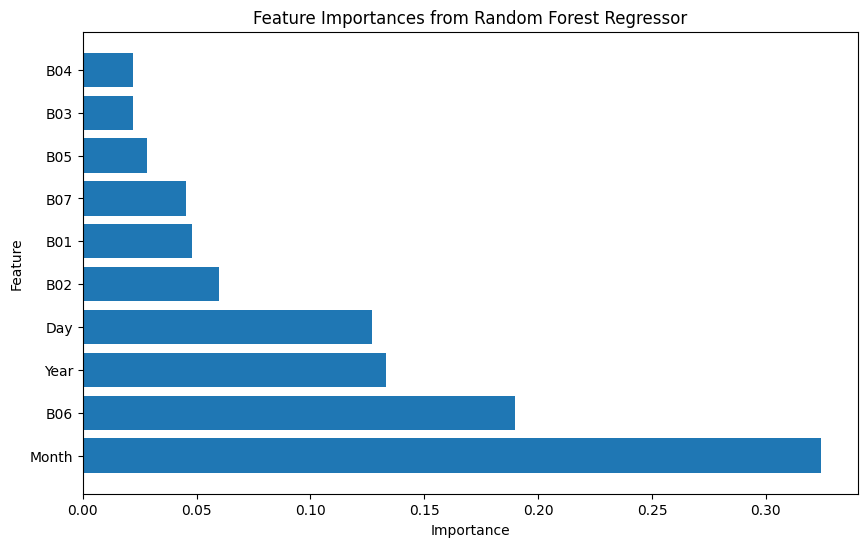

In [17]:
# Get feature importances from the trained RandomForestRegressor model
feature_importances = best_rf.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X_test.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print or display the feature importances
print(feature_importance_df)

# You can also visualize the feature importances using a bar plot
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from Random Forest Regressor')
plt.show()